# Movie Series Sub-Project 1: Movie Data Analysis

<p><b>Author</b>: Jingze Dai</p>
<p><b>McMaster University</b>, Honors Computer Science (Coop) student</p>
<p><b>Personal Email Address</b>: <a>david1147062956@gmail.com</a>, or <a>dai.jingze@icloud.com</a></p>
<a href="https://github.com/daijingz">Github Homepage</a>
<a href="https://www.linkedin.com/in/jingze-dai/">Linkedin Webpage</a>
<a href="https://leetcode.com/david1147062956/">Leetcode Webpage</a>

<i>This sub-project analyze the dataset data with obtained visualized observations.</i>

<i>Your Feedback is important for Jingze's further development. If you want to give feedback and suggestions, or you want to participate in working and learning together, please email Jingze at dai.jingze@icloud.com. If you want Jingze to provide contributions to your research or opensource project or you want Jingze to help you with any programming issues, please email Jingze at david1147062956@gmail.com. Thank you for your help.</i>

## Table of Contents
* [Section 1: Dataset sources](#bullet1)
* [Section 2: Early-stage data observations](#bullet2)
* [Section 3: Data Analysis (Part 1)](#bullet3)
* [Section 4: Data Analysis (Part 2)](#bullet4)
* [Section 5: Data Analysis (Part 3)](#bullet5)
* [Section 6: Data Analysis (Part 4)](#bullet6)
* [Section 7: Data Analysis (Part 5)](#bullet7)

### <a class="anchor" id="bullet1"><b>Section 1</b>: Dataset sources</a>

<b>Name</b>: TMDB 5000 Movie Dataset
<br>
<b>Source</b>: Kaggle
<br>
<b>Download Link</b>: <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">TMDB 5000 Movie Dataset</a>

After downloading the compressed folder, unzip it. The expected situation indicates two datasets: <b>tmdb_5000_credits.csv</b> and <b>tmdb_5000_movies.csv</b> Each dataset contains different information.

Putting these two data files in the same folder with this notebook.

<b>Expected Output</b>
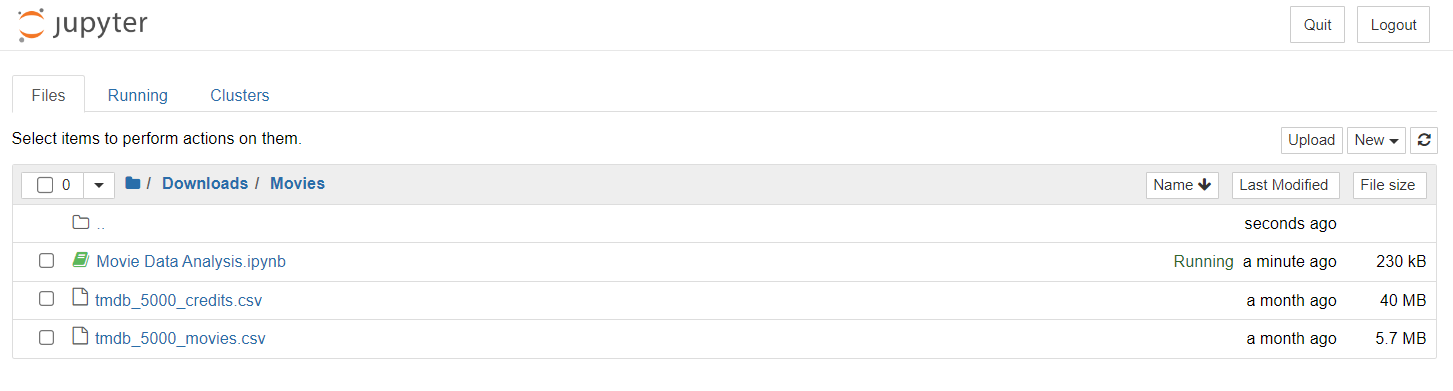

### <a class="anchor" id="bullet2"><b>Section 2</b>: Early-stage data observations</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Existing Datasets: ")
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename[-4:] == '.csv':
            print(os.path.join(dirname, filename))

Existing Datasets: 
C:\Users\david\Downloads\Movies\tmdb_5000_credits.csv
C:\Users\david\Downloads\Movies\tmdb_5000_movies.csv


<b>Dataset 1 Name</b>: tmdb_5000_credits.csv
<br>
<b>Majority Content</b>: Movie participants' information, including crews and casts.
<br>
<b>Columns</b>: 4

| Columns  | Description   |      Range     | # of Values | All values are unique |
|:------------|-----------------------|:------------------|:----------|----------:|
| **movie_id** |      identifier of movies (have unique values)     |  5, 459K |  4813   |       Yes |
| **title**    |      movie title     |    Complicated   |    4800   |       No |
| **cast**     |      cast information     | Complicated |     4761   |       No |
| **crew**     |      crew information     | Complicated |     4776   |       No |

The identifier of each record is the variable "<b>movie_id</b>", ranges from 5 to 459000 and has the integer type. Variable "title" has string values. Variable "cast" and "crew" combines multiple data types, and they do not have specific value ranges.

In [2]:
credit_dataset_path = 'tmdb_5000_credits.csv'
credit_df = pd.read_csv(credit_dataset_path)
print("Number of rows:", credit_df.shape[0])
print("Number of columns:", credit_df.shape[1])
print("\nColumns:")
print(credit_df.columns)
print("\nData Types:")
print(credit_df.dtypes)

Number of rows: 4803
Number of columns: 4

Columns:
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Data Types:
movie_id     int64
title       object
cast        object
crew        object
dtype: object


<b>File Name</b>: tmdb_5000_movies.csv
<br>
<b>Majority Content</b>: Movies' basic information, such as content and budgets
<br>
<b>Columns</b>: 20

| Parameter    | Expected Meaning |
| -------- | ------- |
| budget  |  Cost of all fields inside movie production    |
| genres |  Types (Content types) of movies    |
| homepage    |  URL addresses of movies   |
| id    |  Unique identifiers of movies **(UNIQUE)**  |
| keywords    |  List of movie keywords   |
| original_language    |  The original language of movies   |
| original_title   |  The original title of movies   |
| overview    |  Summary of movie content   |
| popularity   |  Popularity of movies   |
| production_companies    |  Production companies   |
| production_countries   |  Production countries   |
| release_date    |  Release date of movies   |
| revenue   |  Total revenue of movies   |
| runtime    |  Movie's duration time (in minutes)   |
| spoken_languages   |  All available languages on movie versions   |
| status   |  Movie's status   |
| tagline   |  Movie's subtitle or hooks   |
| title   |  Official movie titles   |
| vote_average   |  Customer voting average scores   |
| vote_count   |  Amount of movie votings+   |

In [3]:
major_dataset_path = 'tmdb_5000_movies.csv'
major_df = pd.read_csv(major_dataset_path)
print("Number of rows:", major_df.shape[0])
print("Number of columns:", major_df.shape[1])
print("\nColumns:")
print(major_df.columns)
print("\nData Types:")
print(major_df.dtypes)

Number of rows: 4803
Number of columns: 20

Columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Data Types:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average       

### <a class="anchor" id="bullet3"><b>Section 3</b>: Data Analysis (Part 1)</a>

At first, let's find a few records at the beginning (first 5 rows):

In [5]:
print("\nFirst 5 rows of major dataset:")
print(major_df.head())


First 5 rows of major dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...          

In [6]:
print("\nFirst 5 rows of credit dataset:")
print(credit_df.head())


First 5 rows of credit dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit

Then, before performing normal data analysis, discovering incompleteness, inappropriate values, and conflicts can discover some hidden information inside data. <b>Notice: because this section is about data analysis, there is no need to preprocess or modify data.</b>

In [7]:
import pandas as pd

print("Missing values in each column of the credit data set:")
print(credit_df.isnull().sum())
print("\n")
print("Missing values in each column of the major data set:")
print(major_df.isnull().sum())

Missing values in each column of the credit data set:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Missing values in each column of the major data set:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


Seems like the credit datset does not have any missing values, but there are a lot of missing information on the major movie information fields. There are 5 features with missing values: `homepage`, `overview`, `release_date`, `runtime`, `tagline`

Then we check whether or not there exists some records with identical values:

In [8]:
credit_duplicate_record = credit_df.duplicated().sum()
print("Creit Dataset Total Records Duplications: " + str(credit_duplicate_record))
major_duplicate_record = major_df.duplicated().sum()
print("Major Dataset Total Records Duplications: " + str(major_duplicate_record))

Creit Dataset Total Records Duplications: 0
Major Dataset Total Records Duplications: 0


Seems like there is no repeated record, however, some features with unique values (e.g., identifiers) cannot allow repeated values. Then we checked these two features: `movie_id` and `id`.

In [9]:
duplicate_rows_1 = credit_df.duplicated(subset=['movie_id']).sum()
print("Duplicated movie_id Rows: " + str(duplicate_rows_1))
duplicate_rows_2 = major_df.duplicated(subset=['id']).sum()
print("Duplicated id Rows: " + str(duplicate_rows_2))

Duplicated movie_id Rows: 0
Duplicated id Rows: 0


By observation, there is no duplication between these identifer values.

### <a class="anchor" id="bullet4"><b>Section 4</b>: Data Analysis (Part 2)</a>

Then we discover the range and distribution of meaningful numerical feature values. (including int and float values, IDs do not have any internal meaning).

In this database. there are 6 features with numerical types: `budget`, `popularity`, `revenue`, `runtime`, `vote_average`, and `vote_count`

In [10]:
min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()
print("Feature `budget` range: [" + str(min_budget) + ", " + str(max_budget) + "]")

Feature `budget` range: [0, 380000000]


In [11]:
min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()
print("Feature `popularity` range: [" + str(min_popularity) + ", " + str(max_popularity) + "]")

Feature `popularity` range: [0.0, 875.581305]


In [12]:
min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()
print("Feature `revenue` range: [" + str(min_revenue) + ", " + str(max_revenue) + "]")

Feature `revenue` range: [0, 2787965087]


In [13]:
min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()
print("Feature `runtime` range: [" + str(min_runtime) + ", " + str(max_runtime) + "]")

Feature `runtime` range: [0.0, 338.0]


In [14]:
min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()
print("Feature `vote_average` range: [" + str(min_vote_average) + ", " + str(max_vote_average) + "]")

Feature `vote_average` range: [0.0, 10.0]


In [15]:
min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()
print("Feature `vote_count` range: [" + str(min_vote_count) + ", " + str(max_vote_count) + "]")

Feature `vote_count` range: [0, 13752]


For these features, we divided each of their distributions in more than 20 equal-size intervals:

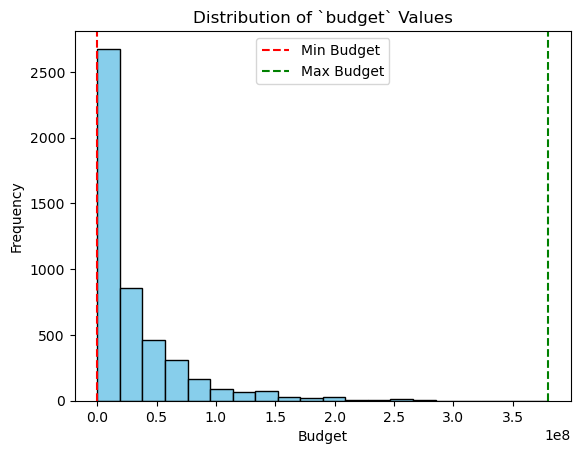

In [16]:
import matplotlib.pyplot as plt

min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()

plt.hist(major_df['budget'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of `budget` Values')

plt.axvline(x=min_budget, color='red', linestyle='--', label='Min Budget')
plt.axvline(x=max_budget, color='green', linestyle='--', label='Max Budget')

plt.legend()
plt.show()

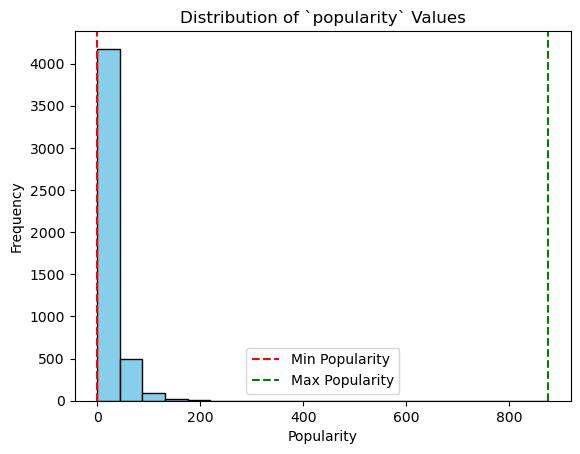

In [17]:
import matplotlib.pyplot as plt

min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()

plt.hist(major_df['popularity'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of `popularity` Values')

plt.axvline(x=min_popularity, color='red', linestyle='--', label='Min Popularity')
plt.axvline(x=max_popularity, color='green', linestyle='--', label='Max Popularity')

plt.legend()
plt.show()

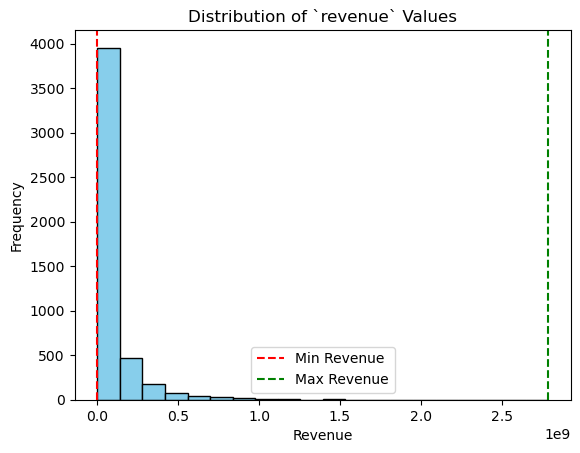

In [18]:
import matplotlib.pyplot as plt

min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()

plt.hist(major_df['revenue'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of `revenue` Values')

plt.axvline(x=min_revenue, color='red', linestyle='--', label='Min Revenue')
plt.axvline(x=max_revenue, color='green', linestyle='--', label='Max Revenue')

plt.legend()
plt.show()

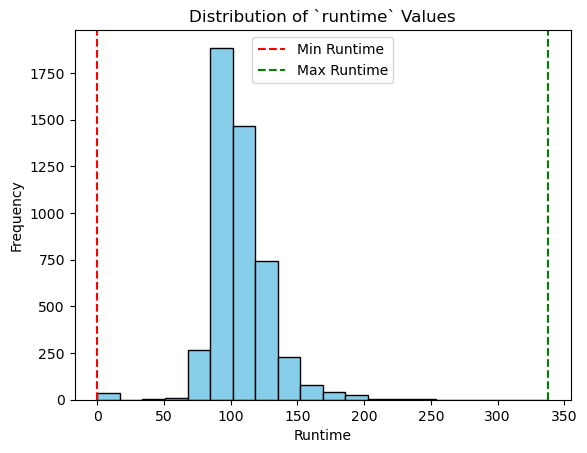

In [19]:
import matplotlib.pyplot as plt

min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()

plt.hist(major_df['runtime'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of `runtime` Values')

plt.axvline(x=min_runtime, color='red', linestyle='--', label='Min Runtime')
plt.axvline(x=max_runtime, color='green', linestyle='--', label='Max Runtime')

plt.legend()
plt.show()

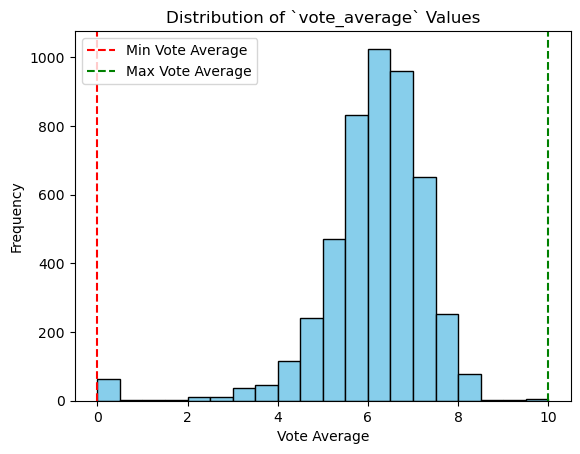

In [20]:
import matplotlib.pyplot as plt

min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()

plt.hist(major_df['vote_average'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_average` Values')

plt.axvline(x=min_vote_average, color='red', linestyle='--', label='Min Vote Average')
plt.axvline(x=max_vote_average, color='green', linestyle='--', label='Max Vote Average')

plt.legend()
plt.show()

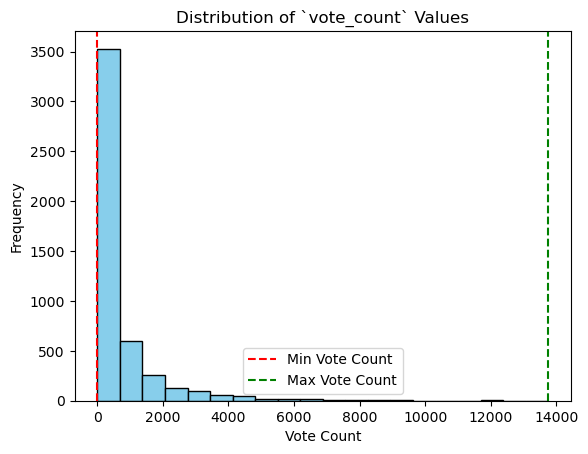

In [21]:
import matplotlib.pyplot as plt

min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()

plt.hist(major_df['vote_count'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_count` Values')

plt.axvline(x=min_vote_count, color='red', linestyle='--', label='Min Vote Count')
plt.axvline(x=max_vote_count, color='green', linestyle='--', label='Max Vote Count')

plt.legend()
plt.show()

Then we discover some summary statistics on all numerical values

In [23]:
print("Summary Statistics for Numerical Columns (Credit Dataset):")
print("Please ignore any identifier columns, because their values does not represent any information.")
print()
print(credit_df.describe())

Summary Statistics for Numerical Columns (Credit Dataset):
Please ignore any identifier columns, because their values does not represent any information.

            movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000


In [24]:
print("Summary Statistics for Numerical Columns (Major Dataset):")
print("Please ignore any identifier columns, because their values does not represent any information.")
print()
print(major_df.describe())

Summary Statistics for Numerical Columns (Major Dataset):
Please ignore any identifier columns, because their values does not represent any information.

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  

### <a class="anchor" id="bullet5"><b>Section 5</b>: Data Analysis (Part 3)</a>

In the next step, our goal is to find all possible values of character-based columns (whose values are repeatable). Combined values' columns (e.g., lists) and meaningless columns (e.g., identifiers) are not included inside.

Notice that some columns below perform data removals from repeated values.

In [13]:
possible_genres = major_df['genres'].unique()
print("\nOccurred Genres:", possible_genres)


Occurred Genres: ['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]']


In [26]:
import ast

unique_genres = {}

for index, row in major_df.iterrows():
    genres_list = ast.literal_eval(row['genres'])
    for genre_dict in genres_list:
        genre_id = genre_dict['id']
        genre_name = genre_dict['name']
        
        if genre_id in unique_genres:
            unique_genres[genre_id][1] += 1
        else:
            unique_genres[genre_id] = [genre_name, 1]

print("Unique Genres:")
for genre_id, (genre_name, occurrences) in unique_genres.items():
    print("ID:", genre_id, "- Name:", genre_name, "- Occurrences:", occurrences)
    
print("\nTotal Genres: " + str(len(unique_genres.items())))

sorted_genres_a = sorted(unique_genres.items(), key=lambda x: x[1][1], reverse=True)
sorted_genres_d = sorted(unique_genres.items(), key=lambda x: x[1][1], reverse=False)

print("\nTop 3 Genres with Highest Occurrences:")
for genre_id, (genre_name, occurrences) in sorted_genres_a[:3]:
    print("ID:", genre_id, "- Name:", genre_name, "- Occurrences:", occurrences)
    
print("\nTop 3 Genres with Lowest Occurrences:")
for genre_id, (genre_name, occurrences) in sorted_genres_d[:3]:
    print("ID:", genre_id, "- Name:", genre_name, "- Occurrences:", occurrences)

Unique Genres:
ID: 28 - Name: Action - Occurrences: 1154
ID: 12 - Name: Adventure - Occurrences: 790
ID: 14 - Name: Fantasy - Occurrences: 424
ID: 878 - Name: Science Fiction - Occurrences: 535
ID: 80 - Name: Crime - Occurrences: 696
ID: 18 - Name: Drama - Occurrences: 2297
ID: 53 - Name: Thriller - Occurrences: 1274
ID: 16 - Name: Animation - Occurrences: 234
ID: 10751 - Name: Family - Occurrences: 513
ID: 37 - Name: Western - Occurrences: 82
ID: 35 - Name: Comedy - Occurrences: 1722
ID: 10749 - Name: Romance - Occurrences: 894
ID: 27 - Name: Horror - Occurrences: 519
ID: 9648 - Name: Mystery - Occurrences: 348
ID: 36 - Name: History - Occurrences: 197
ID: 10752 - Name: War - Occurrences: 144
ID: 10402 - Name: Music - Occurrences: 185
ID: 99 - Name: Documentary - Occurrences: 110
ID: 10769 - Name: Foreign - Occurrences: 34
ID: 10770 - Name: TV Movie - Occurrences: 8

Total Genres: 20

Top 3 Genres with Highest Occurrences:
ID: 18 - Name: Drama - Occurrences: 2297
ID: 35 - Name: Comedy

In [5]:
possible_keywords = major_df['keywords'].unique()
print("\nOccurred Keywords:", possible_keywords)


Occurred Keywords: ['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'
 '[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id"

In [27]:
import ast

unique_keywords = {}

for index, row in major_df.iterrows():
    keywords_list = ast.literal_eval(row['keywords'])
    for keywords_dict in keywords_list:
        keywords_id = keywords_dict['id']
        keywords_name = keywords_dict['name']
        
        if keywords_id in unique_keywords:
            unique_keywords[keywords_id][1] += 1
        else:
            unique_keywords[keywords_id] = [keywords_name, 1]

print("Unique Keywords:")
for keywords_id, (keywords_name, occurrences) in unique_keywords.items():
    print("ID:", keywords_id, "- Name:", keywords_name, "- Occurrence:", occurrences)
    
print("\nTotal Keywords: " + str(len(unique_keywords.items())))

sorted_keywords_a = sorted(unique_keywords.items(), key=lambda x: x[1][1], reverse=True)
sorted_keywords_d = sorted(unique_keywords.items(), key=lambda x: x[1][1], reverse=False)

print("\nTop 3 Keywords with Highest Occurrences:")
for keywords_id, (keywords_name, occurrences) in sorted_keywords_a[:3]:
    print("ID:", keywords_id, "- Name:", keywords_name, "- Occurrences:", occurrences)
    
print("\nTop 3 Keywords with Lowest Occurrences:")
for keywords_id, (keywords_name, occurrences) in sorted_keywords_d[:3]:
    print("ID:", keywords_id, "- Name:", keywords_name, "- Occurrences:", occurrences)

Unique Keywords:
ID: 1463 - Name: culture clash - Occurrence: 14
ID: 2964 - Name: future - Occurrence: 47
ID: 3386 - Name: space war - Occurrence: 2
ID: 3388 - Name: space colony - Occurrence: 6
ID: 3679 - Name: society - Occurrence: 6
ID: 3801 - Name: space travel - Occurrence: 22
ID: 9685 - Name: futuristic - Occurrence: 9
ID: 9840 - Name: romance - Occurrence: 23
ID: 9882 - Name: space - Occurrence: 27
ID: 9951 - Name: alien - Occurrence: 76
ID: 10148 - Name: tribe - Occurrence: 4
ID: 10158 - Name: alien planet - Occurrence: 7
ID: 10987 - Name: cgi - Occurrence: 5
ID: 11399 - Name: marine - Occurrence: 3
ID: 13065 - Name: soldier - Occurrence: 39
ID: 14643 - Name: battle - Occurrence: 31
ID: 14720 - Name: love affair - Occurrence: 3
ID: 165431 - Name: anti war - Occurrence: 2
ID: 193554 - Name: power relations - Occurrence: 3
ID: 206690 - Name: mind and soul - Occurrence: 5
ID: 209714 - Name: 3d - Occurrence: 98
ID: 270 - Name: ocean - Occurrence: 16
ID: 726 - Name: drug abuse - Occ

In [17]:
possible_ol = major_df['original_language'].unique()
print("\nOccurred Original Language:", possible_ol)
print("\nTotal Original Language: " + str(len(possible_ol)))


Occurred Original Language: ['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']

Total Original Language: 37


In [8]:
possible_company = major_df['production_companies'].unique()
print("\nOccurred Production Companies:", possible_company)


Occurred Production Companies: ['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'
 '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]'
 '[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]'
 ...
 '[{"name": "Asylum Films", "id": 10571}, {"name": "FM Entertainment", "id": 26598}, {"name": "Eagle Eye Films Inc.", "id": 40739}]'
 '[{"name": "Front Street Pictures", "id": 3958}, {"name": "Muse Entertainment Enterprises", "id": 6438}]'
 '[{"name": "rusty bear entertainment", "id": 87986}, {"name": "lucky crow films", "id": 87987}]']


In [29]:
import ast

unique_production_companies = {}

for index, row in major_df.iterrows():
    production_companies_list = ast.literal_eval(row['production_companies'])
    for production_companies_dict in production_companies_list:
        production_companies_id = production_companies_dict['id']
        production_companies_name = production_companies_dict['name']
        
        if production_companies_id in unique_production_companies:
            unique_production_companies[production_companies_id][1] += 1
        else:
            unique_production_companies[production_companies_id] = [production_companies_name, 1]

print("Unique Production Companies:")
for production_companies_id, (production_companies_name, occurrences) in unique_production_companies.items():
    print("ID:", production_companies_id, "- Name:", production_companies_name, "- Occurrences:", occurrences)
    
print("\nTotal Production Companies: " + str(len(unique_production_companies.items())))

sorted_production_companies_a = sorted(unique_production_companies.items(), key=lambda x: x[1][1], reverse=True)
sorted_production_companies_d = sorted(unique_production_companies.items(), key=lambda x: x[1][1], reverse=False)

print("\nTop 3 Production Companies with Highest Occurrences:")
for production_companies_id, (production_companies_name, occurrences) in sorted_production_companies_a[:3]:
    print("ID:", production_companies_id, "- Name:", production_companies_name, "- Occurrences:", occurrences)
    
print("\nTop 3 Production Companies with Lowest Occurrences:")
for production_companies_id, (production_companies_name, occurrences) in sorted_production_companies_d[:3]:
    print("ID:", production_companies_id, "- Name:", production_companies_name, "- Occurrences:", occurrences)

Unique Production Companies:
ID: 289 - Name: Ingenious Film Partners - Occurrences: 29
ID: 306 - Name: Twentieth Century Fox Film Corporation - Occurrences: 222
ID: 444 - Name: Dune Entertainment - Occurrences: 59
ID: 574 - Name: Lightstorm Entertainment - Occurrences: 5
ID: 2 - Name: Walt Disney Pictures - Occurrences: 114
ID: 130 - Name: Jerry Bruckheimer Films - Occurrences: 21
ID: 19936 - Name: Second Mate Productions - Occurrences: 2
ID: 5 - Name: Columbia Pictures - Occurrences: 201
ID: 10761 - Name: Danjaq - Occurrences: 8
ID: 69434 - Name: B24 - Occurrences: 1
ID: 923 - Name: Legendary Pictures - Occurrences: 34
ID: 6194 - Name: Warner Bros. - Occurrences: 319
ID: 9993 - Name: DC Entertainment - Occurrences: 12
ID: 9996 - Name: Syncopy - Occurrences: 8
ID: 326 - Name: Laura Ziskin Productions - Occurrences: 5
ID: 19551 - Name: Marvel Enterprises - Occurrences: 16
ID: 6125 - Name: Walt Disney Animation Studios - Occurrences: 8
ID: 420 - Name: Marvel Studios - Occurrences: 13
ID:

In [10]:
possible_country = major_df['production_countries'].unique()
print("\nOccurred Production Countries:", possible_country)


Occurred Production Countries: ['[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'
 '[{"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "JM", "name": "Jamaica"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "BS", "name": "Bahamas"}, {"iso_3166_1": "DM", "name": "Dominica"}]'
 '[{"iso_3166_1": "CZ", "name": "Czech Republic"}, {"iso_3166_1": "PL", "name": "Poland"}, {"iso_3166_1": "SI", "name": "Slovenia"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "DE", "name": "Germany"}]'
 '[{"iso_3166_1": "CN", "name": "China"}, {"iso_3166_

In [31]:
import ast

unique_production_countries = {}

for index, row in major_df.iterrows():
    production_countries_list = ast.literal_eval(row['production_countries'])
    for production_countries_dict in production_countries_list:
        production_countries_id = production_countries_dict['iso_3166_1']
        production_countries_name = production_countries_dict['name']
        
        if production_countries_id in unique_production_countries:
            unique_production_countries[production_countries_id][1] += 1
        else:
            unique_production_countries[production_countries_id] = [production_countries_name, 1]

print("Unique Production Countries:")
for production_countries_id, (production_countries_name, occurrences) in unique_production_countries.items():
    print("ID:", production_countries_id, "- Name:", production_countries_name, "- Occurrences:", occurrences)

print("\nTotal Production Countries:", len(unique_production_countries))

sorted_production_countries_a = sorted(unique_production_countries.items(), key=lambda x: x[1][1], reverse=True)
sorted_production_countries_d = sorted(unique_production_countries.items(), key=lambda x: x[1][1], reverse=False)

print("\nTop 3 Production Countries with Highest Occurrences:")
for production_countries_id, (production_countries_name, occurrences) in sorted_production_countries_a[:3]:
    print("ID:", production_countries_id, "- Name:", production_countries_name, "- Occurrences:", occurrences)
    
print("\nTop 3 Production Countries with Lowest Occurrences:")
for production_countries_id, (production_countries_name, occurrences) in sorted_production_countries_d[:3]:
    print("ID:", production_countries_id, "- Name:", production_countries_name, "- Occurrences:", occurrences)

Unique Production Countries:
ID: US - Name: United States of America - Occurrences: 3956
ID: GB - Name: United Kingdom - Occurrences: 636
ID: JM - Name: Jamaica - Occurrences: 2
ID: BS - Name: Bahamas - Occurrences: 4
ID: DM - Name: Dominica - Occurrences: 1
ID: CZ - Name: Czech Republic - Occurrences: 24
ID: PL - Name: Poland - Occurrences: 6
ID: SI - Name: Slovenia - Occurrences: 2
ID: NZ - Name: New Zealand - Occurrences: 28
ID: DE - Name: Germany - Occurrences: 324
ID: CN - Name: China - Occurrences: 59
ID: CA - Name: Canada - Occurrences: 261
ID: IT - Name: Italy - Occurrences: 72
ID: JP - Name: Japan - Occurrences: 58
ID: MT - Name: Malta - Occurrences: 4
ID: AU - Name: Australia - Occurrences: 110
ID: FR - Name: France - Occurrences: 306
ID: BE - Name: Belgium - Occurrences: 25
ID: IN - Name: India - Occurrences: 54
ID: NL - Name: Netherlands - Occurrences: 18
ID: ES - Name: Spain - Occurrences: 71
ID: AE - Name: United Arab Emirates - Occurrences: 14
ID: HK - Name: Hong Kong - 

In [12]:
possible_sl = major_df['spoken_languages'].unique()
print("\nOccurred Spoken Language:", possible_sl)


Occurred Spoken Language: ['[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'
 '[{"iso_639_1": "en", "name": "English"}]'
 '[{"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "tr", "name": "T\\u00fcrk\\u00e7e"}, {"iso_639_1": "el", "name": "\\u03b5\\u03bb\\u03bb\\u03b7\\u03bd\\u03b9\\u03ba\\u03ac"}

In [32]:
import ast

unique_spoken_languages = {}

for index, row in major_df.iterrows():
    spoken_languages_list = ast.literal_eval(row['spoken_languages'])
    for spoken_languages_dict in spoken_languages_list:
        spoken_languages_id = spoken_languages_dict['iso_639_1']
        spoken_languages_name = spoken_languages_dict['name']
        
        if spoken_languages_id in unique_spoken_languages:
            unique_spoken_languages[spoken_languages_id][1] += 1
        else:
            unique_spoken_languages[spoken_languages_id] = [spoken_languages_name, 1]

print("Unique Spoken Language:")
for spoken_languages_id, (spoken_languages_name, occurrences) in unique_spoken_languages.items():
    print("ID:", spoken_languages_id, "- Name:", spoken_languages_name, "- Occurrences:", occurrences)
    
print("\nTotal Spoken Language: " + str(len(unique_spoken_languages.items())))

sorted_spoken_languages_a = sorted(unique_spoken_languages.items(), key=lambda x: x[1][1], reverse=True)
sorted_spoken_languages_d = sorted(unique_spoken_languages.items(), key=lambda x: x[1][1], reverse=False)

print("\nTop 3 Spoken Languages with Highest Occurrences:")
for spoken_languages_id, (spoken_languages_name, occurrences) in sorted_spoken_languages_a[:3]:
    print("ID:", spoken_languages_id, "- Name:", spoken_languages_name, "- Occurrences:", occurrences)
    
print("\nTop 3 Spoken Languages with Lowest Occurrences:")
for spoken_languages_id, (spoken_languages_name, occurrences) in sorted_spoken_languages_d[:3]:
    print("ID:", spoken_languages_id, "- Name:", spoken_languages_name, "- Occurrences:", occurrences)

Unique Spoken Language:
ID: en - Name: English - Occurrences: 4485
ID: es - Name: Español - Occurrences: 351
ID: fr - Name: Français - Occurrences: 437
ID: it - Name: Italiano - Occurrences: 188
ID: de - Name: Deutsch - Occurrences: 262
ID: tr - Name: Türkçe - Occurrences: 18
ID: el - Name: ελληνικά - Occurrences: 20
ID: zh - Name: 普通话 - Occurrences: 107
ID: th - Name: ภาษาไทย - Occurrences: 40
ID: is - Name: Íslenska - Occurrences: 5
ID: ru - Name: Pусский - Occurrences: 185
ID: sv - Name: svenska - Occurrences: 22
ID: ro - Name: Română - Occurrences: 13
ID: ja - Name: 日本語 - Occurrences: 97
ID: la - Name: Latin - Occurrences: 52
ID: hi - Name: हिन्दी - Occurrences: 48
ID: pt - Name: Português - Occurrences: 68
ID: bo - Name:  - Occurrences: 4
ID: fa - Name: فارسی - Occurrences: 12
ID: ur - Name: اردو - Occurrences: 15
ID: ar - Name: العربية - Occurrences: 67
ID: sa - Name:  - Occurrences: 1
ID: gd - Name:  - Occurrences: 6
ID: cs - Name: Český - Occurrences: 38
ID: cn - Name: 广州话 / 廣州

Some of displayed language values does not have names, but their **ids** are unique. 

In [18]:
possible_status = major_df['status'].unique()
print("\nOccurred Statis:", possible_status)


Occurred Statis: ['Released' 'Post Production' 'Rumored']


### <a class="anchor" id="bullet6"><b>Section 6</b>: Data Analysis (Part 4)</a>

In this section, we study the binary relationships and distributions between two different numerical values.

At first, let's find distributions between movie popularity and revenue.

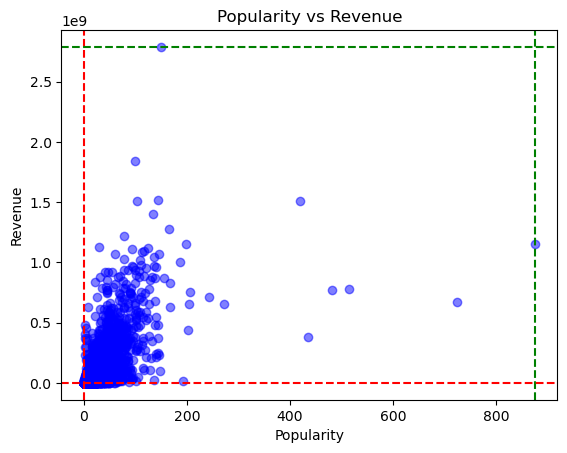

In [19]:
import matplotlib.pyplot as plt

plt.scatter(major_df['popularity'], major_df['revenue'], color='blue', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')

plt.axvline(x=major_df['popularity'].min(), color='red', linestyle='--', label='Min Popularity')
plt.axvline(x=major_df['popularity'].max(), color='green', linestyle='--', label='Max Popularity')
plt.axhline(y=major_df['revenue'].min(), color='red', linestyle='--', label='Min Revenue')
plt.axhline(y=major_df['revenue'].max(), color='green', linestyle='--', label='Max Revenue')

plt.show()

In [6]:
records_nonnull = major_df[(major_df['popularity'].notna()) & (major_df['revenue'].notna())]
num_records_nonnull = len(records_nonnull)
records_within_conditions = major_df[(major_df['popularity'] <= 200) & (major_df['revenue'] <= 1.0)]
num_records_within_conditions = len(records_within_conditions)

print("Number of records with popularity <= 200 and revenue <= 1.0:", num_records_within_conditions)
print("Percentage: ", num_records_within_conditions/num_records_nonnull)

Number of records with popularity <= 200 and revenue <= 1.0: 1427
Percentage:  0.29710597543202166


By observastion, there is a strange situation: only 30% of records have popularity <= 200 and revenue <= 1.0, which seems to be inconsistent with the visualized diagram above. From diagrams we can find that most records lie on the interval popularity <= 200 and revenue <= 1.0.

Another thing is that, movies with low popularity usually has a lower revenue.

Then we studied the relationships between `runtime` and both `popularity` and `revenue`.

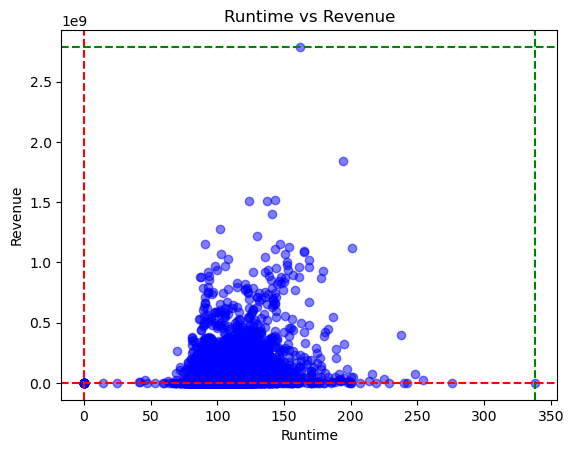

In [7]:
import matplotlib.pyplot as plt

plt.scatter(major_df['runtime'], major_df['revenue'], color='blue', alpha=0.5)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Runtime vs Revenue')

plt.axvline(x=major_df['runtime'].min(), color='red', linestyle='--', label='Min Runtime')
plt.axvline(x=major_df['runtime'].max(), color='green', linestyle='--', label='Max Runtime')
plt.axhline(y=major_df['revenue'].min(), color='red', linestyle='--', label='Min Revenue')
plt.axhline(y=major_df['revenue'].max(), color='green', linestyle='--', label='Max Revenue')

plt.show()

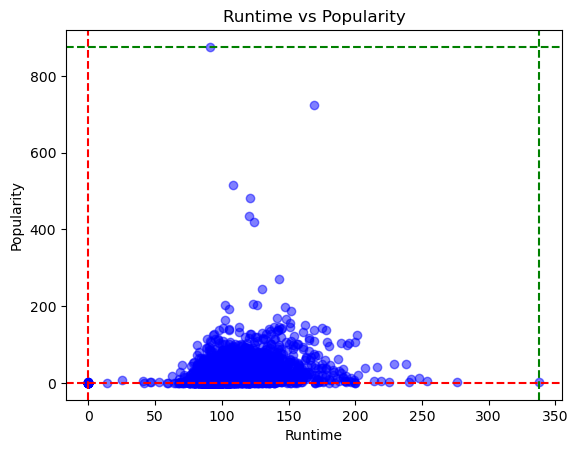

In [8]:
import matplotlib.pyplot as plt

plt.scatter(major_df['runtime'], major_df['popularity'], color='blue', alpha=0.5)
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title('Runtime vs Popularity')

plt.axvline(x=major_df['runtime'].min(), color='red', linestyle='--', label='Min Runtime')
plt.axvline(x=major_df['runtime'].max(), color='green', linestyle='--', label='Max Runtime')
plt.axhline(y=major_df['popularity'].min(), color='red', linestyle='--', label='Min Popularity')
plt.axhline(y=major_df['popularity'].max(), color='green', linestyle='--', label='Max Popularity')

plt.show()

Both of them are similar because the `runtime` distribution are the same. By observation, most movies are in this interval: `runtime` in [50, 200], `popularity` in [0, 200], `revenue` in [0.0, 1.0].

Then we find movies `vote_count` and `vote_average` relationships. My estimation is, if a movie has a plenty of votes (`vote_count` is large), then its average voting scores (`vote_average`) must be high or low.

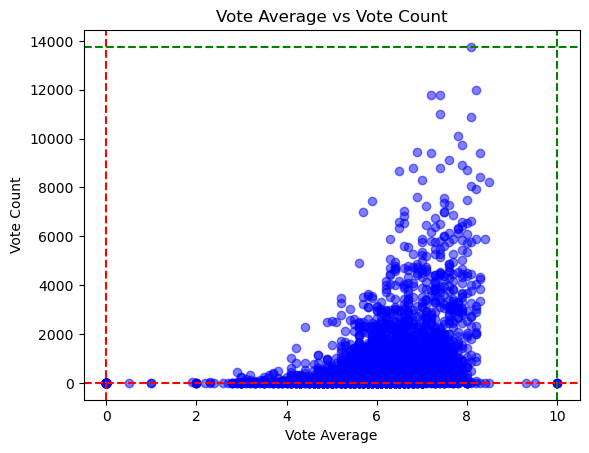

In [9]:
import matplotlib.pyplot as plt

plt.scatter(major_df['vote_average'], major_df['vote_count'], color='blue', alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.title('Vote Average vs Vote Count')

plt.axvline(x=major_df['vote_average'].min(), color='red', linestyle='--', label='Min Vote Average')
plt.axvline(x=major_df['vote_average'].max(), color='green', linestyle='--', label='Max Vote Average')
plt.axhline(y=major_df['vote_count'].min(), color='red', linestyle='--', label='Min Vote Count')
plt.axhline(y=major_df['vote_count'].max(), color='green', linestyle='--', label='Max Vote Count')

plt.show()

In [7]:
records_nonnull = major_df[(major_df['vote_count'].notna()) & (major_df['vote_average'].notna())]
num_records_nonnull = len(records_nonnull)
records_within_conditions = major_df[(major_df['vote_count'] <= 8000) & (major_df['vote_average'] <= 8.0)
                                     & (major_df['vote_average'] >= 2.0)]
num_records_within_conditions = len(records_within_conditions)

print("Number of records with votes <= 8000 and 2.0 <= vote average score <= 8.0:", num_records_within_conditions)
print("Percentage: ", num_records_within_conditions/num_records_nonnull)

Number of records with votes <= 8000 and 2.0 <= vote average mark <= 8.0: 4672
Percentage:  0.9727253799708515


In [5]:
records_within_conditions = major_df[(major_df['vote_count'] >= 8000)]
mean_vote_count_within_conditions = records_within_conditions['vote_count'].mean()
mean_vote_average_within_conditions = records_within_conditions['vote_average'].mean()

print("Number of rating records with votes >= 8000:", mean_vote_count_within_conditions)
print("Rating average with votes >= 8000:", mean_vote_average_within_conditions)

Number of rating records with votes >= 8000: 9775.42857142857
Rating average with votes >= 8000: 7.647619047619049


From diagrams we can see that, most movies have the voting average score in [2.0, 8.0], with lower than 8000 ratings. One inconsistent point from our prediction is, those movies with high rating amounts have the voting average score in [6.0, 8.0].

### <a class="anchor" id="bullet7"><b>Section 7</b>: Data Analysis (Part 5)</a>

This section we analyze the internal information of each movie's casts and crews. 